<a href="https://colab.research.google.com/github/EDWINYAPZ/trading-strategies-part-2-/blob/main/trading_strategies_(part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear OLS regression

In [ ]:
The data

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import warnings

In [ ]:
plt.style.use("seaborn")
mpl.rcParams["font.family"] = "serif"
%config InlineBackend.figure_format = "svg"

<ipython-input-6-a899520e17b6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tr_eikon_eod_data (2).csv to tr_eikon_eod_data (2).csv


In [ ]:
warnings.simplefilter("ignore")
plt.style.use("seaborn")
mpl.rcParams["font.family"] = "serif"
np.random.seed(1000)
%config InlineBackend.figure_format = 'svg'

In [ ]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna()

In [ ]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [ ]:
symbol = "EUR="

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
data["return"] = np.log(data / data.shift(1))

In [ ]:
data.dropna(inplace=True)

In [ ]:
data["direction"] = np.sign(data["return"]).astype(int)

In [ ]:
data.head()

,EUR=,return,direction
Date,,,
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
2010-01-11,1.4513,0.006984,1


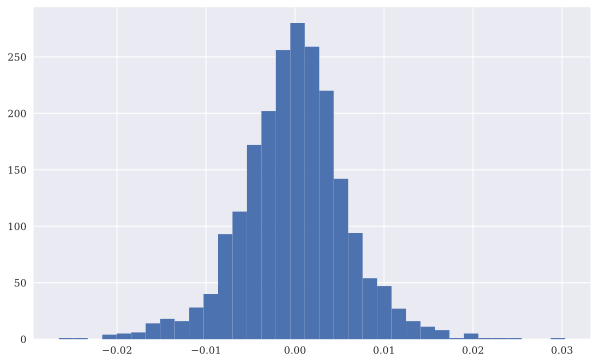

In [ ]:
data["return"].hist(bins=35, figsize=(10, 6));
#plt.savefig(../../images/ch15/strat_ml_01.png)

In [ ]:
lags = 2

In [ ]:
def create_lags(data):
  global cols
  cols = []
  for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data["return"].shift(lag)
    cols.append(col)


In [ ]:
create_lags(data)

In [ ]:
data.head()
#lag1 is historical of one day
#lag2 is historical of two day

,EUR=,return,direction,lag_1,lag_2
Date,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984


In [ ]:
data.dropna(inplace=True)

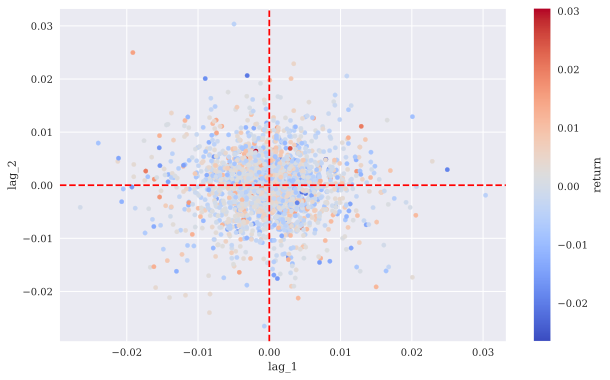

In [ ]:
data.plot.scatter(x="lag_1", y="lag_2", c="return",
                  cmap="coolwarm", figsize=(10, 6), colorbar=True)
plt.axvline(0, c="r", ls="--")
plt.axhline(0, c="r", ls="--");
#plt.savefig("../../images/ch15/strat_ms_02.png")
#EDA = 1)DATA 2)PREPORASING 3)EDA 4) AVERAGE ML/REGRESSION 5) TESTING (BELOW 80% GO BCK 4)steps )

regression

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression() #primary interest

In [ ]:
data["pos_ols_1"] = model.fit(data[cols], data["return"]).predict(data[cols])


In [ ]:
data["pos_ols_2"] = model.fit(data[cols], data["direction"]).predict(data[cols])


In [ ]:
data[["pos_ols_1", "pos_ols_2"]].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-07,-0.000166,-0.000086
2010-01-08,0.000017,0.040404
2010-01-11,-0.000244,-0.011756
2010-01-12,-0.000139,-0.043398
2010-01-13,-0.000022,0.002237


In [ ]:
data[["pos_ols_1", "pos_ols_2"]] = np.where(
    data[["pos_ols_1", "pos_ols_2"]] > 0, 1, -1)


In [ ]:
data["pos_ols_1"].value_counts()


-1    1847
 1     288
Name: pos_ols_1, dtype: int64

In [ ]:
data["pos_ols_2"].value_counts()


 1    1377
-1     758
Name: pos_ols_2, dtype: int64

In [ ]:
(data["pos_ols_1"].diff() != 0).sum()

555

In [ ]:
(data["pos_ols_2"].diff() != 0).sum()

762

In [ ]:
data["strat_ols_1"] = data["pos_ols_1"] * data["return"]

In [ ]:
data["strat_ols_2"] = data["pos_ols_2"] * data["return"]

In [ ]:
data[["return", "strat_ols_1", "strat_ols_2"]].sum().apply(np.exp)

return         0.810644
strat_ols_1    0.942422
strat_ols_2    1.000024
dtype: float64

In [ ]:
(data["direction"] == data["pos_ols_1"]).value_counts()

False    1093
True     1042
dtype: int64

In [ ]:
(data["direction"] == data["pos_ols_2"]).value_counts()

False    2126
True        9
dtype: int64

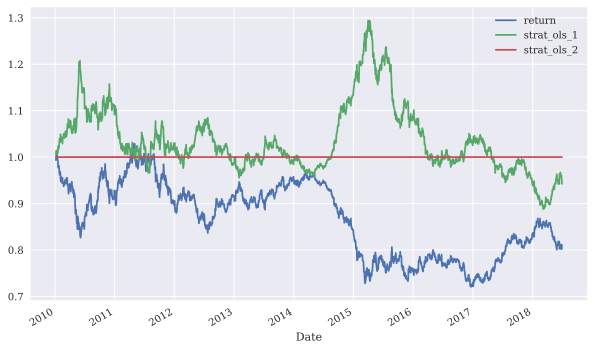

In [ ]:
data[["return", "strat_ols_1", "strat_ols_2"]].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
#plt.savefig("../../images/ch15/strat_ml_03.ong");

clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2, random_state=0) # <1>

In [ ]:
model.fit(data[cols])

KMeans(n_clusters=2, random_state=0)

In [ ]:
data["pos_clus"] = model.predict(data[cols])

In [ ]:
data["pos_clus"] = np.where(data["pos_clus"] == 1, -1, 1)

In [ ]:
data["pos_clus"].values

array([ 1, -1,  1, ..., -1, -1,  1])

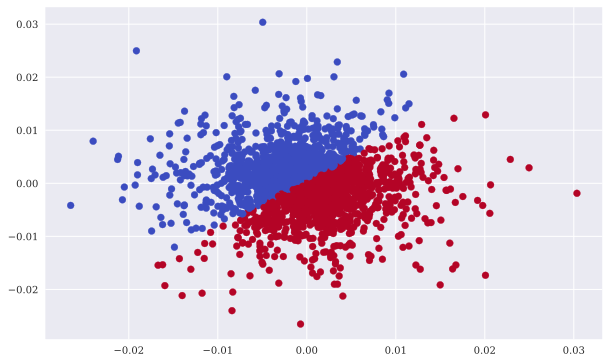

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1],
            c=data["pos_clus"], cmap="coolwarm");
#plt.savefif("../../images/ch15/strat_ml_04.png");

classification algorithms

In [ ]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
C = 1

In [ ]:
models = {
    "log_reg" : linear_model.LogisticRegression(C=C),
    "gauss_nb" : GaussianNB(),
    "svm" : SVC(C=C)
}

In [ ]:
def fit_models(data):
  mfit = {model: models[model].fit(data[cols_bin], data["direction"])
          for model in models.keys()}

In [ ]:
fit_models(data)

NameError: ignored

Frequency approach

In [ ]:
def create_bins(data, bins=[0]):
  global cols_bin
  cols_bin = []
  for col in cols:
    col_bin = col + "bin"
    data[col_bin] = np.digitize(data[col], bins=bins)
    cols_bin.append(col_bin)

In [ ]:
create_bins(data)

In [ ]:
data[cols_bin + ["direction"]].head()

,lag_1bin,lag_2bin,direction
Date,,,
2010-01-07,1,0,-1
2010-01-08,0,1,1
2010-01-11,1,0,1
2010-01-12,1,1,-1
2010-01-13,0,1,1


In [ ]:
grouped = data.groupby(cols_bin + ["direction"])
grouped.size()

lag_1bin  lag_2bin  direction
0         0         -1           239
                     0             4
                     1           258
          1         -1           262
                     1           288
1         0         -1           272
                     0             1
                     1           278
          1         -1           278
                     0             4
                     1           251
dtype: int64

Deep neural network

DNN with scikit-learn

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(solver="lbfgs", alpha=1e-5,
                      hidden_layer_sizes=2 * [250], random_state=1)


In [ ]:
%time model.fit(data[cols_bin], data["direction"])

CPU times: user 5.45 s, sys: 4.1 s, total: 9.54 s
Wall time: 6.26 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[250, 250], random_state=1,
              solver='lbfgs')

In [ ]:
data["pos_dnn_sk"] = model.predict(data [cols_bin])

In [ ]:
data["strat_dnn_sk"] = data["pos_dnn_sk"] * data["return"]

In [ ]:
data[["return", "strat_dnn_sk"]].sum().apply(np.exp)

return          0.810644
strat_dnn_sk    0.989513
dtype: float64

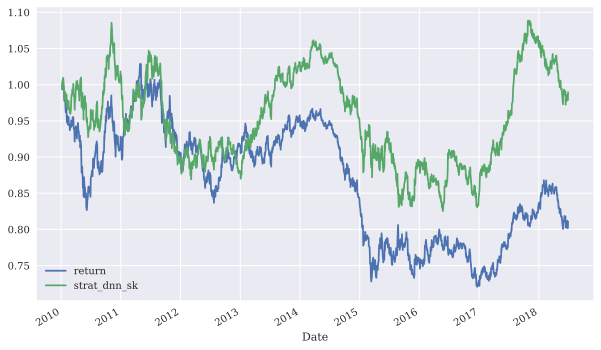

In [ ]:
data[["return", "strat_dnn_sk"]].cumsum().apply(np.exp).plot(figsize=(10, 6));
#plt.savefig("../../images/ch15/strat_ml_12.png");

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data, test_size=0.5, random_state=100)


In [ ]:
train = train.copy().sort_index()

In [ ]:
test = test.copy().sort_index()

In [ ]:
model = MLPClassifier(solver="lbfgs", alpha=1e-5, max_iter=500,
                      hidden_layer_sizes=3 * [500], random_state=1)

In [ ]:
%time model.fit(train[cols_bin], train["direction"])

CPU times: user 10.9 s, sys: 5.36 s, total: 16.2 s
Wall time: 12.6 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[500, 500, 500], max_iter=500,
              random_state=1, solver='lbfgs')

In [ ]:
test["pos_dnn_sk"] = model.predict(test[cols_bin])

In [ ]:
test["strat_dnn_sk"] = test["pos_dnn_sk"] * test["return"]

In [ ]:
test[["return", "strat_dnn_sk"]].sum().apply(np.exp)

return          1.098987
strat_dnn_sk    0.909929
dtype: float64

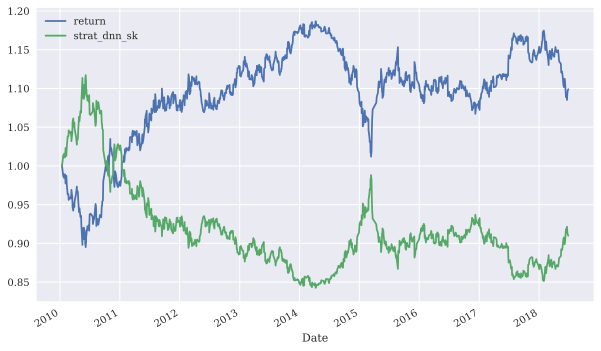

In [ ]:
test[["return", "strat_dnn_sk"]].cumsum().apply(np.exp).plot(figsize=(10, 6));
#plt.savefig("../../images/ch15/strat_ml_13.png");

DNN with keras & tensorflow backend

In [ ]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
def create_model():
  np.random.seed(100)
  tf.random.set_seed(1000)
  model = Sequential()
  model.add(Dense(16, activation="relu", input_dim=lags))
  model.add(Dense(16, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss="binary_crossentropy", optimizer="rmsprop",
                metrics=["accuracy"])
  return model

In [ ]:
data_ = (data - data.mean()) / data.std()
data["direction_"] = np.where(data["direction"] == 1, 1, 0)

In [ ]:
model = create_model()

In [ ]:
%%time
model.fit(data_[cols], data["direction_"],
          epochs=50, verbose=False)

CPU times: user 8.29 s, sys: 305 ms, total: 8.59 s
Wall time: 9.79 s


In [ ]:
model.evaluate(data_[cols], data["direction_"])

67/67 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5471


[0.6875025033950806, 0.5470725893974304]

In [ ]:
pred = np.where(model.predict(data_[cols]) > 0.5, 1, 0)
pred[:10].flatten()

67/67 [==============================] - 0s 1ms/step


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
data["pos_dnn_ke"] = np.where(pred > 0, 1, -1)

In [ ]:
data["strat_dnn_ke"] = data["pos_dnn_ke"] * data["return"]

In [ ]:
data[["return", "strat_dnn_ke"]].sum().apply(np.exp)

return          0.810644
strat_dnn_ke    2.986944
dtype: float64

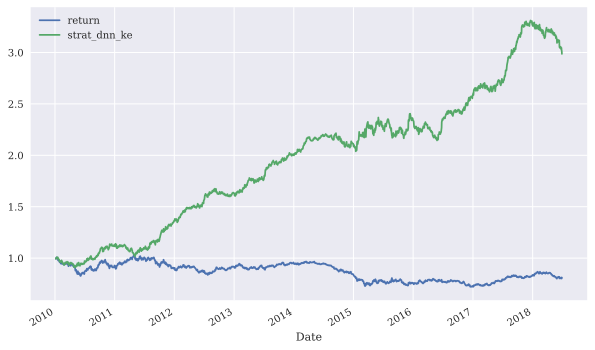

In [ ]:
data[["return", "strat_dnn_ke"]].cumsum(
         ).apply(np.exp).plot(figsize=(10, 6));
#plt.savefig("../../images/ch15/strat_ml_14.png");